In [1]:
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean
import numpy as np
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import NearestNeighbors
from sklearn import preprocessing
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt


In [10]:
def data_preprocessing(file):
    data, tmp, pre, tmp2, data_raw = {}, [], '', [], {}
    for line in open(file,'r').readlines():
        line = line.split(',')
        if line[0] == 'name' and pre != '':
            tmp2 = tmp
            data_raw[pre] = np.asarray(tmp2,dtype='f')
            data[pre] = preprocessing.normalize(np.asarray(tmp2,dtype='f'))
            tmp = []
        elif line[0] == 'name': 
            data['name'] = line[2:]
            data_raw['name'] = line[2:]
        if line[2].isdigit() == True:
            row = []
            for i in range(2,47):
                row.append(0.0 if line[i]=='' else float(line[i]))	
            tmp.append(np.asarray(row, dtype='f'))
            pre = line[0]
    tmp2 = tmp
    data[pre] = preprocessing.normalize(np.asarray(tmp2,dtype='f'))
    data_raw[pre] = np.asarray(tmp2,dtype='f')
    return [data, data_raw]



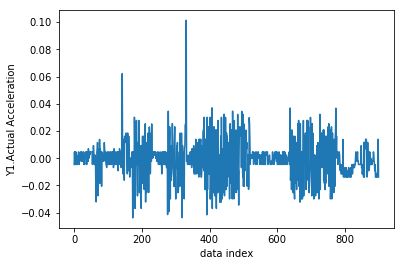

In [16]:
train_pos = 'G_Fifty_9'
train_neg = 'G_Hundred_1'
test_pos = 'G_Fifty_2'
test_neg = 'G_Hundred_4'
data,raw = data_preprocessing('data.csv')
# nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(X)
plt.plot(data[train_pos][:,26])
plt.ylabel('Y1.Actual Acceleration')
plt.xlabel('data index')
mean = np.mean(data[train_pos], axis=1)
var = np.var(data[train_pos], axis=1)
dict, cor = {}, {}

for i in range(45):
    for j in range(45):
        if i != j:
            dict[(i,j)] = abs((mean[i]-mean[j]))/(var[i]+var[j]) - np.correlate(data[train_pos][:,j], data[train_pos][:,i])
            
            
x1 = data[train_pos]
x2 = data[train_neg]
x1_ = data[test_pos]
x2_ = data[test_neg]

# dist, path = fastdtw(x1,x2, dist=euclidean)
# print dist
# dist, path = fastdtw(x1_, x2_, dist=euclidean)
# print dist
# dist, path = fastdtw(x1,x2_, dist=euclidean)
# print dist
# dist, path = fastdtw(x1_, x2, dist=euclidean)
# print dist
# dist, path = fastdtw(x1,x1_, dist=euclidean)
# print dist
# dist, path = fastdtw(x2, x2_, dist=euclidean)
# print dist

# for key, val in sorted(dict.iteritems(), key=lambda (k,v): (v,k), reverse=True):
#     print data['name'][key[0]], data['name'][key[1]],val

# for key, val in sorted(cor.iteritems(), key=lambda (k,v): (v,k)):
#     print data['name'][key[0]], data['name'][key[1]],val
# plt.plot(np.mean((x1), axis=1))
# # print np.mean(np.mean(x1,axis=1))
# # print np.mean(np.mean(x2,axis=1))
# plt.figure(2)
# plt.plot(np.mean((x2), axis=1))
plt.show()

In [23]:
# cnt = 1
# for cnt in range(45):
#     plt.figure(cnt+1)
#     #preprocessing.normalize()
#     plt.subplot(211)
#     plt.plot(data[train_pos][1:8000,cnt])
#     plt.title(data['name'][cnt])
#     plt.subplot(212)
#     plt.plot(data[train_neg][1:8000,cnt])
    
# plt.show()

X1 = np.concatenate((data[train_pos][:,4],data[train_neg][:,4]), axis=0).reshape(-1,1)
X2 = np.concatenate((data[train_pos][:,26],data[train_neg][:,26]), axis=0).reshape(-1,1)
X =  np.concatenate((X1, X2), axis=1)
y = np.concatenate((0*np.ones(len(data[train_pos])),np.ones(len(data[train_neg]))),axis=0).reshape(-1,1)

X1_ = np.concatenate((data[test_pos][:,4],data[test_neg][:,4]), axis=0).reshape(-1,1)
X2_ = np.concatenate((data[test_pos][:,26],data[test_neg][:,26]), axis=0).reshape(-1,1)
X_ =  np.concatenate((X1_, X2_), axis=1)
#X_pre = np.concatenate((data[test_pos][:,4].reshape(-1,1),data[test_pos][:,26].reshape(-1,1)), axis=1)
#print X.shape, y.shape, X_pre

# kmeans = KMeans(n_clusters=2)
# kmeans.fit(X,y)
# labels = kmeans.predict(X_)
# print labels
# clf = SVC(degree=3, kernel='rbf')
# clf.fit(X,y)
# clf.predict(X_)




[1 1 1 ..., 1 0 1]


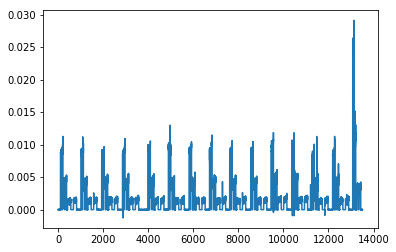

In [7]:
plt.plot(data[train_neg][:,35])
plt.show()